In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings

In [5]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [8]:
df = pd.read_csv('/content/spam_ham_dataset.csv')

In [9]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [12]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [10]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Ham and Spam e-mail')

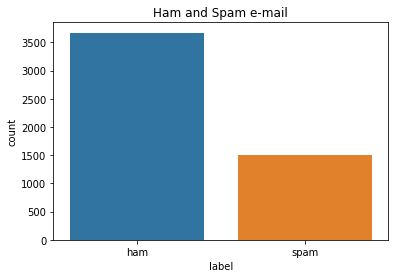

In [15]:
sns.countplot(df.label)
plt.xlabel('label')
plt.title('Ham and Spam e-mail')

In [18]:
a = df.text 
b = df.label

In [21]:
en = LabelEncoder()
b = en.fit_transform(b)
b = b.reshape(-1,1)

In [28]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.10)

In [29]:
words = 1000
length = 100 
tokenizer = Tokenizer(num_words = words)
tokenizer.fit_on_texts(a_train)


In [30]:
sequences = tokenizer.texts_to_sequences(a_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen = length)

In [31]:
inputs = Input(shape = [length])
A = Embedding(words, 50, input_length=length)(inputs)
A = LSTM(64)(A)
A = Dense(256)(A)
A = Activation('relu')(A)
A = Dropout(0.5)(A)
A = Dense(1)(A)
output = Activation('sigmoid')(A)


In [32]:
model = Model(inputs = inputs, outputs = output)


In [33]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257   

In [34]:
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])

In [35]:
history = model.fit(sequences_matrix, b_train, batch_size = 128, epochs = 10, validation_split = 0.2, 
                    callbacks = [EarlyStopping(monitor = 'val_loss', min_delta = 0.0001)])

Epoch 1/10
30/30 [==============================] - 7s 148ms/step - loss: 0.4093 - accuracy: 0.8192 - val_loss: 0.2596 - val_accuracy: 0.9280
Epoch 2/10
30/30 [==============================] - 5s 154ms/step - loss: 0.1279 - accuracy: 0.9586 - val_loss: 0.1932 - val_accuracy: 0.9270


In [37]:
test_sequences = tokenizer.texts_to_sequences(a_test)


In [38]:
test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen = length)

In [39]:
acc = model.evaluate(test_sequences_matrix, b_test)

17/17 [==============================] - 0s 16ms/step - loss: 0.1780 - accuracy: 0.9324


In [40]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acc[0], acc[1]))

Test set
  Loss: 0.178
  Accuracy: 0.932
